## Noise revisited

In [99]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation
from connectivity_functions import create_matrix_from_sequences_representation, produce_overlaped_sequences
from analysis_functions import calculate_recall_time_quantities, get_weights
from analysis_functions import get_weights_collections
from plotting_functions import plot_network_activity_angle, plot_weight_matrix
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances
from analysis_functions import calculate_patterns_timings, calculate_recall_success_nr, calculate_T_persistence

epsilon = 10e-80

## An example

noise 10.0
1.0
theo 0.18349229377
[0.13100000000000001,
 0.14799999999999999,
 0.11800000000000001,
 0.121,
 0.107,
 0.095000000000000001,
 0.127,
 0.14300000000000002]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
CPU times: user 900 ms, sys: 0 ns, total: 900 ms
Wall time: 900 ms


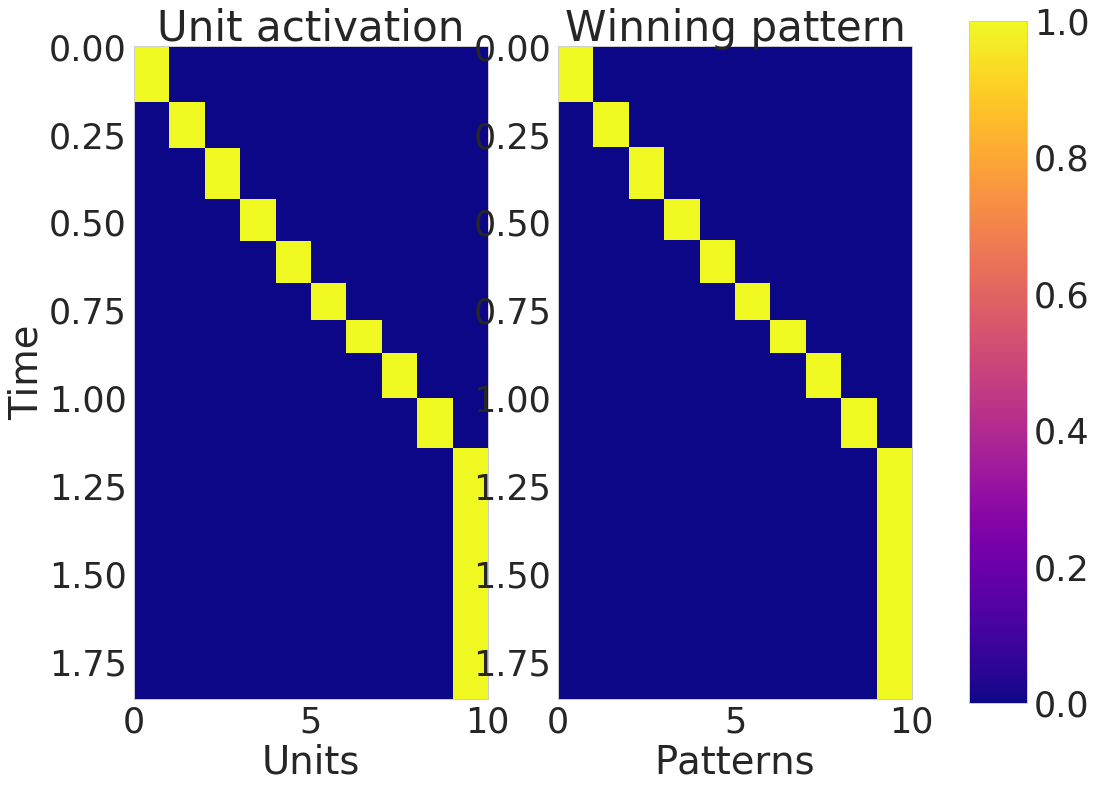

In [143]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
g_beta = 0.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0

# Noise
factor = 30

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 10
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents, g_beta=g_beta, g_I=g_I)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = alpha 
T_persistence_theo = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
# Recall
T_cue = tau_m
T_recall = n_patterns * T_persistence_theo + T_cue

# Noise
w_robust = 2 * alpha
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
g_beta = 0.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0

# Noise
factor = 30

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 10
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents, g_beta=g_beta, g_I=g_I)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = alpha 
T_persistence_theo = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
# Recall
T_cue = tau_m
T_recall = n_patterns * T_persistence_theo + T_cue

# Noise
w_robust = 2 * alpha
current_gap = g_w_ampa * w_robust
noise = factor * current_gap
nn.sigma = noise
sigma = 10.0
nn.sigma = sigma 


aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
s, timings, pattern_sequence = aux
T_persistence = [t[1] for t in timings[1:-1]]
plot_network_activity_angle(manager)
print('noise', nn.sigma)
print(s)
print('theo', T_persistence_theo)
pprint.pprint(T_persistence)
pprint.pprint(pattern_sequence)
nn.sigma = noise
sigma = 10.0
nn.sigma = sigma 


aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
s, timings, pattern_sequence = aux
T_persistence = [t[1] for t in timings[1:-1]]
plot_network_activity_angle(manager)
print('noise', nn.sigma)
print(s)
print('theo', T_persistence_theo)
pprint.pprint(T_persistence)
pprint.pprint(pattern_sequence)

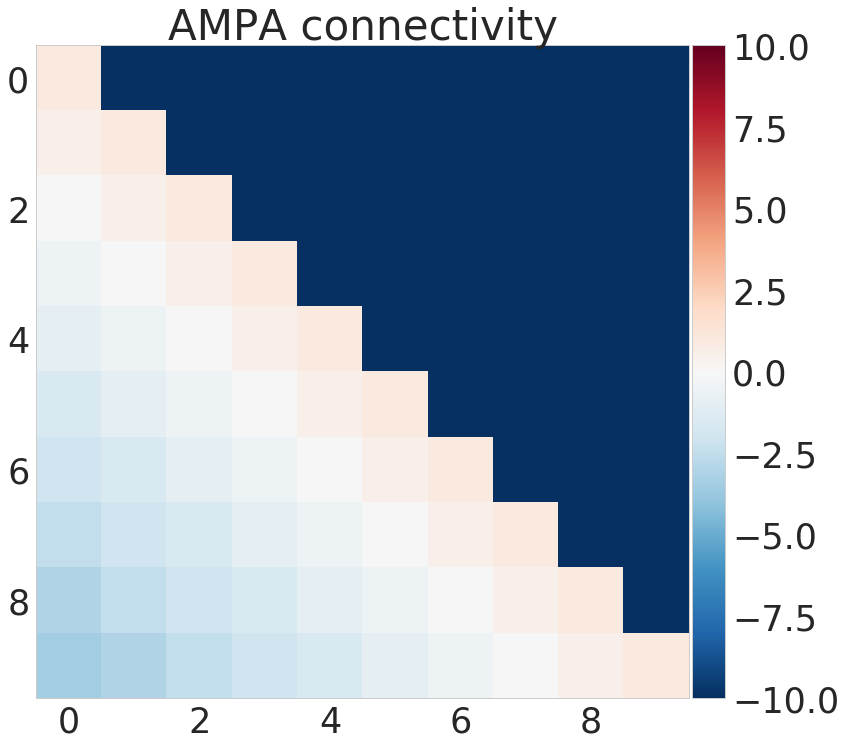

In [144]:
plot_weight_matrix(manager.nn, ampa=True)

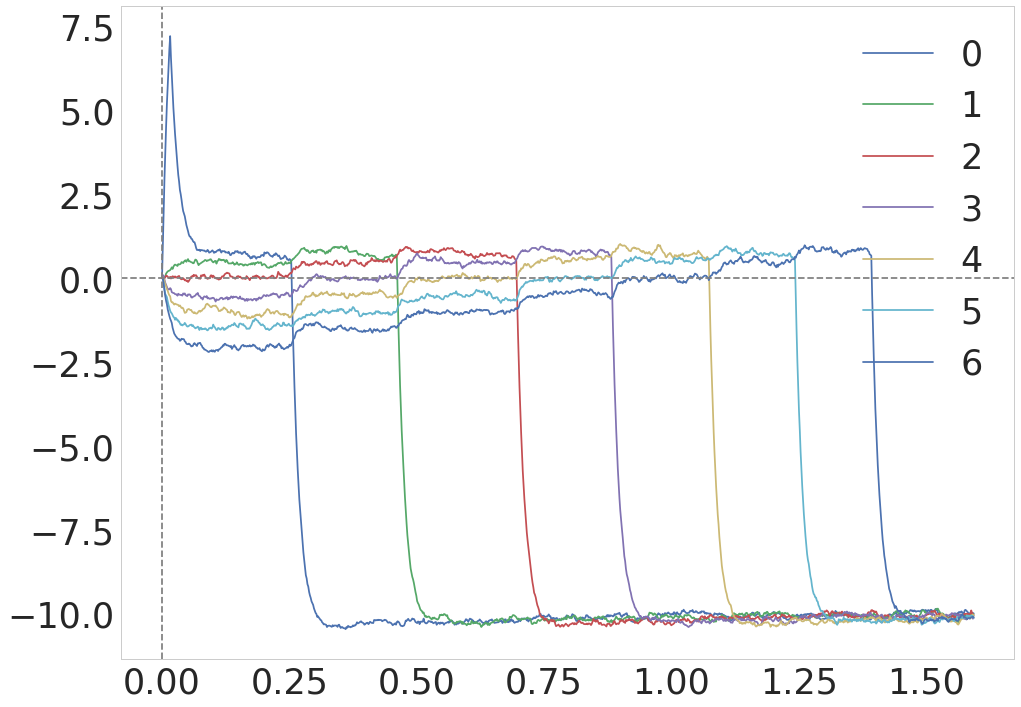

In [145]:
s = manager.history['s']
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
patternt_to_plot = [0, 1, 2, 3, 4, 5, 6]

plot_till = 1.0 
n_till = int(plot_till / manager.dt)
time = np.linspace(0, manager.T_total, num=o.shape[0])

for pattern in patternt_to_plot:
    ax.plot(time[:n_till], s[:n_till, pattern], label=str(pattern))
    
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

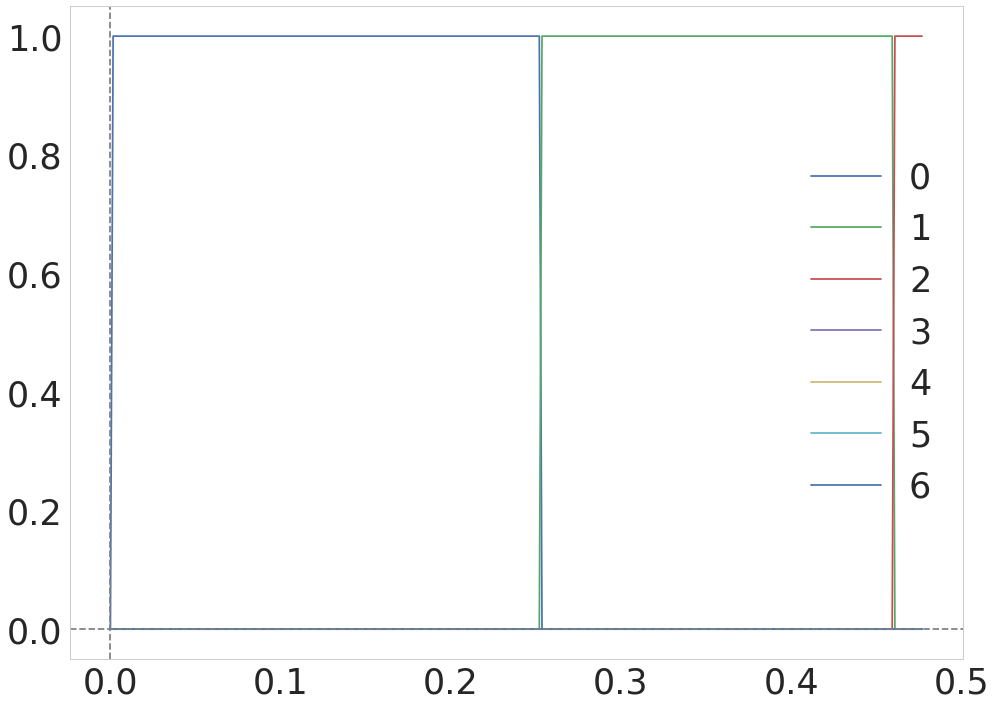

In [146]:
s = manager.history['o']
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
patternt_to_plot = [0, 1, 2, 3, 4, 5, 6]

plot_till = 0.3 
n_till = int(plot_till / manager.dt)
time = np.linspace(0, manager.T_total, num=o.shape[0])

for pattern in patternt_to_plot:
    ax.plot(time[:n_till], s[:n_till, pattern], label=str(pattern))
    
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

## Systematic

In [116]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
g_beta = 0.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009

factor = 0.0

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 10
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = w[1, 1] - w[2, 1]

# Noise
num = 30
trials = 100
sigma_vector = np.linspace(0, 80.0, num=num)
successes = np.zeros((num, trials))
persistence_times = np.zeros((num, trials, n_patterns - 2))
pattern_sequences = {}

w_robust = w[1, 1] - w[3, 1]
current = g_w_ampa * w_robust
T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
T_recall = 1.2 * T_persistence * n_patterns + T_cue
print('T_recall', T_recall)

for sigma_index, factor in enumerate(sigma_vector):
    aux_sequences = []
    print(sigma_index, num)
    noise = factor * current
    nn.sigma = noise
    for trial_index in range(trials):
        aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
        s, timings, pattern_sequence = aux
        times = [t[1] for t in timings[1:-1]]
        n_aux = min((len(times), n_patterns - 2))
        successes[sigma_index, trial_index] = s
        persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]
        aux_sequences.append(pattern_sequence)
    pattern_sequences[sigma_index] = aux_sequences

T_recall 2.22190752524
0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
CPU times: user 28min 28s, sys: 544 ms, total: 28min 28s
Wall time: 28min 28s


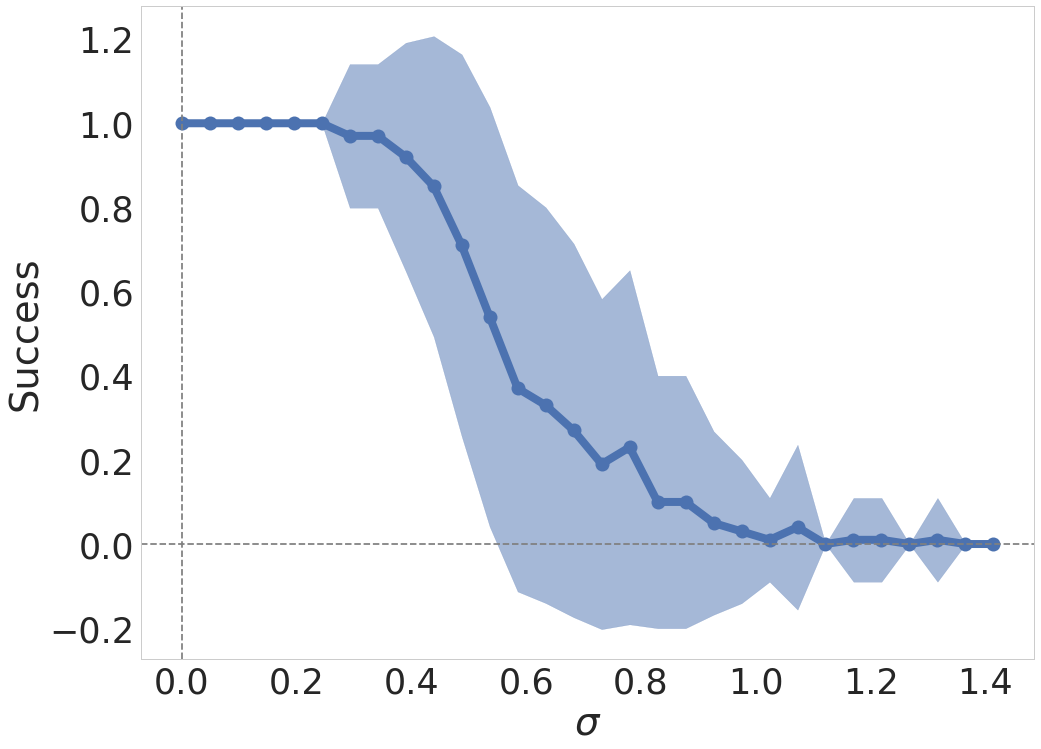

In [124]:
current_palette = sns.color_palette()
sigma_outcome = sigma_vector * np.sqrt(tau_m * 0.5) / (4  * w_robust * g_w_ampa)
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

mean_success = np.mean(successes, axis=1)
std = np.std(successes, axis=1)

ax.plot(sigma_outcome, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_outcome, mean_success - std, mean_success + std,
                color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

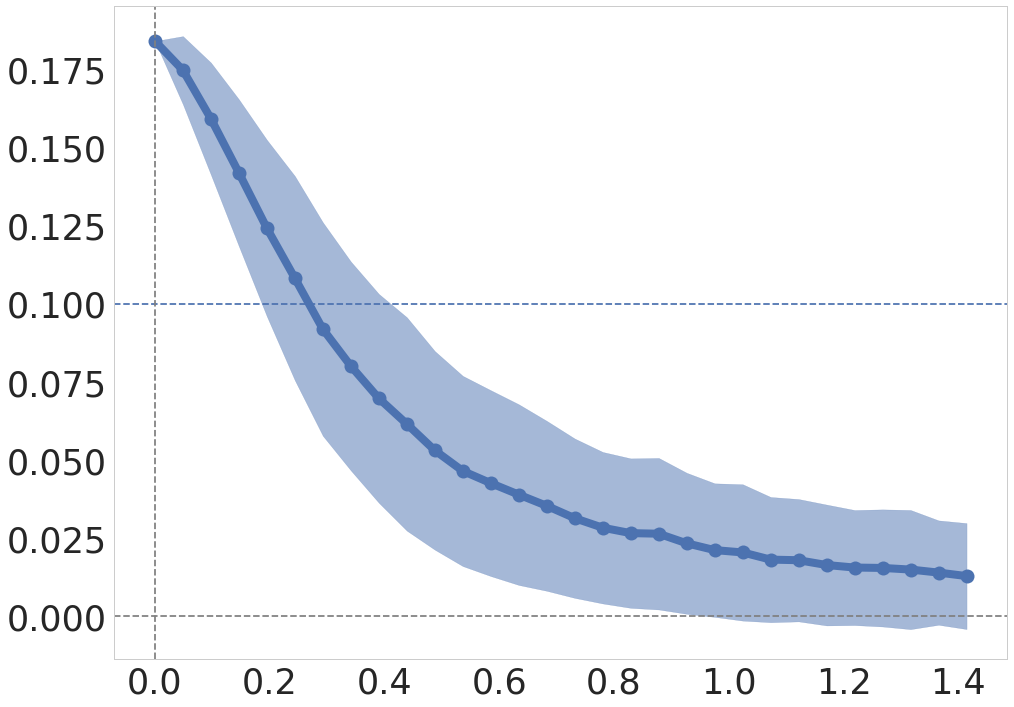

In [133]:
index = 0

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

pt_mean = np.mean(persistence_times, axis=(1, 2))
pt_std = np.std(persistence_times, axis=(1, 2))
ax.plot(sigma_outcome, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_outcome, pt_mean - pt_std, pt_mean + pt_std,
                color=current_palette[index], alpha=alpha)

ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [131]:
pattern_sequences[27]

[[0, 3, 4, 6, 8, 9],
 [0, 1, 2, 5, 9],
 [0, 1, 5, 8, 9],
 [0, 2, 3, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 8, 9],
 [0, 2, 3, 4, 8, 9],
 [0, 4, 6, 7, 8, 9],
 [0, 2, 4, 5, 7, 8, 9],
 [0, 2, 6, 7, 8, 9],
 [0, 2, 5, 9],
 [0, 1, 3, 5, 9],
 [0, 3, 6, 7, 8, 9],
 [0, 1, 2, 4, 5, 7, 8, 9],
 [0, 3, 6, 9],
 [0, 2, 3, 4, 6, 9],
 [0, 1, 2, 4, 5, 7, 8, 9],
 [0, 3, 4, 6, 8, 9],
 [0, 1, 3, 4, 6, 8, 9],
 [0, 6, 9],
 [0, 1, 2, 4, 5, 6, 8, 9],
 [0, 1, 2, 4, 7, 8, 9],
 [0, 1, 2, 4, 5, 7, 8, 9],
 [0, 3, 4, 9],
 [0, 2, 4, 5, 6, 9],
 [0, 1, 3, 5, 6, 7, 8, 9],
 [0, 3, 7, 9],
 [0, 1, 3, 4, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 8, 9],
 [0, 1, 3, 5, 6, 7, 8, 9],
 [0, 3, 5, 6, 8, 9],
 [0, 1, 3, 4, 6, 8, 9],
 [0, 3, 5, 6, 7, 8, 9],
 [0, 1, 2, 4, 5, 7, 8, 9],
 [0, 3, 6, 8, 9],
 [0, 1, 2, 4, 5, 6, 8, 9],
 [0, 1, 2, 5, 7, 8, 9],
 [0, 2, 3, 5, 7, 8, 9],
 [0, 2, 3, 5, 9],
 [0, 3, 5, 6, 7, 8, 9],
 [0, 1, 3, 5, 8, 9],
 [0, 4, 8, 9],
 [0, 1, 3, 5, 6, 9],
 [0, 1, 2, 5, 9],
 [0, 2, 3, 5, 6, 7, 9],
 [0, 1, 2, 3, 7, 8, 9],
 [0, 3, 4, 5, 6,

In [130]:
successes[27]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [106]:
pattern_sequence

[0, 2, 5, 6, 7, 9]

In [107]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

In [108]:
[strictly_increasing(x) for x in pattern_sequences[15]]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [109]:
[all([strictly_increasing(x) for x in pattern_sequences[y]]) for y in range(num)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

#### Current

In [110]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009


# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

success_list = []
theo_persistent = []
persistent_time_list = []
alpha_set = [0.5, 1.0, 3.0]
num = 25
trials = 100

for alpha in alpha_set:
    print('-----')
    print('alpha', alpha)
    n_connections = len(seq) - 1
    value = 1.0
    extension = 10
    weights = [value for i in range(n_connections)]
    weights_collection = [weights]
    sequences = [seq]
    w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                    extension, alpha, w_min=-10.0)

    # Neural Network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                      sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                      z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                      perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                      normalized_currents=normalized_currents)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


    nn.w_ampa = w
    aux, indexes = np.unique(nr, axis=0, return_index=True)
    patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
    manager.patterns_dic = patterns_dic

    # T persistence
    w_tran = w[1, 1] - w[2, 1]

    # Noise
    sigma_vector = np.linspace(0, 60.0, num=num)
    successes = np.zeros((num, trials))
    persistence_times = np.zeros((num, trials, n_patterns - 2))

    w_robust = w[1, 1] - w[3, 1]
    current = g_w_ampa * w_robust
    T_persistence = 0.040
    r = tau_m / tau_a
    f = 1 - r
    B = 1 - (1/f) * np.exp(-T_persistence / tau_a)
    g_a = g_w_ampa * w_tran / B
    nn.g_a = g_a
    
    T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
    T_recall = 1.2 * T_persistence * n_patterns + T_cue
    theo_persistent.append(T_persistence)
    
    for sigma_index, factor in enumerate(sigma_vector):
        print(sigma_index, num)
        noise = factor * current
        nn.sigma = noise
        for trial_index in range(trials):
            aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
            s, timings, pattern_sequence = aux
            times = [t[1] for t in timings[1:-1]]
            n_aux = min((len(times), n_patterns - 2))
            successes[sigma_index, trial_index] = s
            persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]

    success_list.append(successes)
    persistent_time_list.append(persistence_times)

-----
alpha 0.5
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
-----
alpha 1.0
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
-----
alpha 3.0
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
CPU times: user 15min 52s, sys: 484 ms, total: 15min 52s
Wall time: 15min 52s


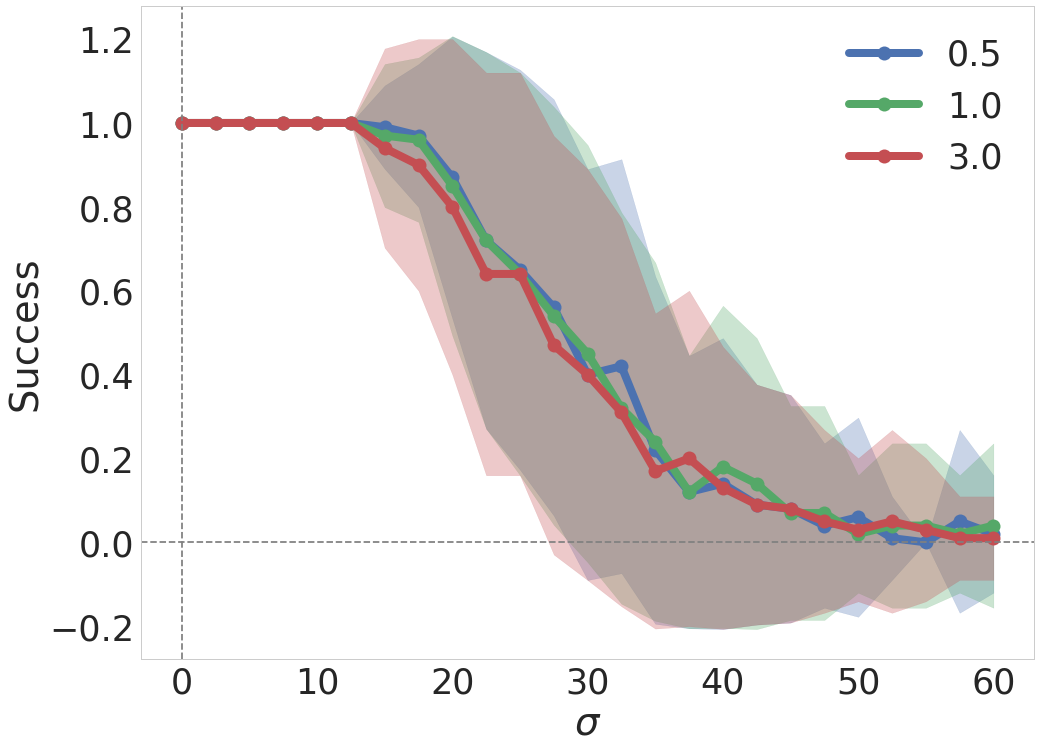

In [111]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
alpha = 0.3

for index, successes in enumerate(success_list):

    mean_success = np.mean(successes, axis=1)
    std = np.std(successes, axis=1)
   
    ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms, 
            label=str(alpha_set[index]))

    ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.legend();
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

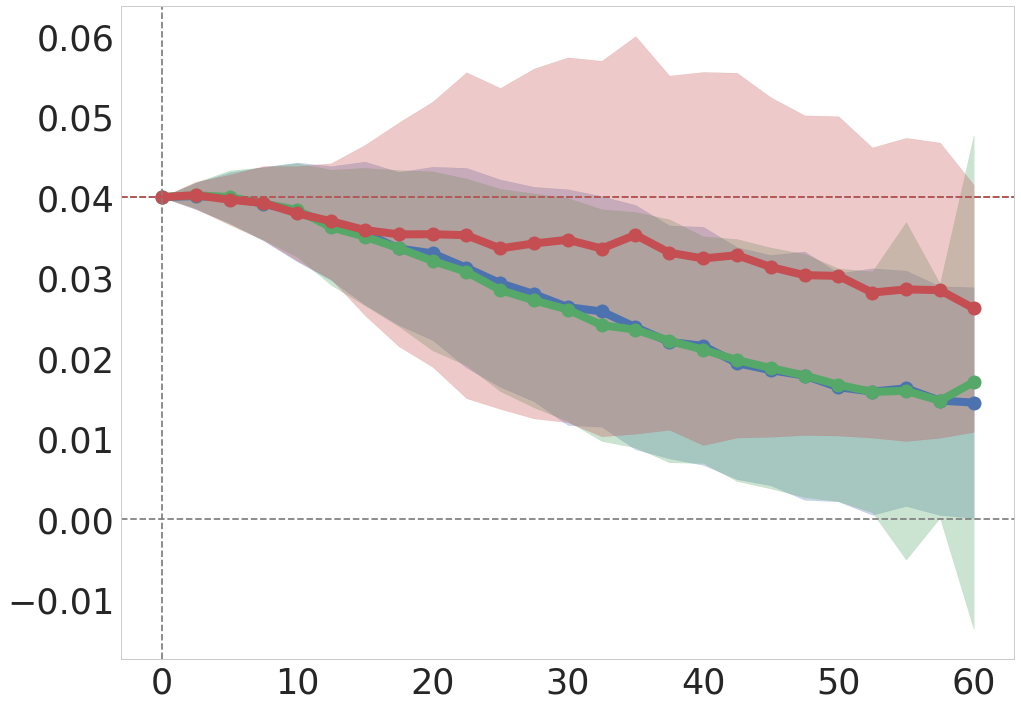

In [112]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, persistence_times in enumerate(persistent_time_list):
    persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

    pt_mean = np.mean(persistence_times, axis=(1, 2))
    pt_std = np.std(persistence_times, axis=(1, 2))
    ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
    ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                    color=current_palette[index], alpha=alpha)
    
    ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

#### Test for different persistent times

In [113]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009


# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

success_list = []
theo_persistent = []
persistent_time_list = []
T_persistence_list = [0.100, 0.250, 0.500]

num = 25
trials = 100

for  T_persistence in T_persistence_list:
    print('-----')
    print('T_persistence',  T_persistence)
    n_connections = len(seq) - 1
    value = 1.0
    extension = 10
    alpha = 0.5
    weights = [value for i in range(n_connections)]
    weights_collection = [weights]
    sequences = [seq]
    w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                    extension, alpha, w_min=-10.0)

    # Neural Network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                      sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                      z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                      perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                      normalized_currents=normalized_currents)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


    nn.w_ampa = w
    aux, indexes = np.unique(nr, axis=0, return_index=True)
    patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
    manager.patterns_dic = patterns_dic

    # T persistence
    w_tran = w[1, 1] - w[2, 1]

    # Noise
    sigma_vector = np.linspace(0, 60.0, num=num)
    successes = np.zeros((num, trials))
    persistence_times = np.zeros((num, trials, n_patterns - 2))

    w_robust = w[1, 1] - w[3, 1]
    current = g_w_ampa * w_robust
    r = tau_m / tau_a
    f = 1 - r
    B = 1 - (1/f) * np.exp(-T_persistence / tau_a)
    g_a = g_w_ampa * w_tran / B
    nn.g_a = g_a
    
    T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
    T_recall = 1.2 * T_persistence * n_patterns + T_cue
    theo_persistent.append(T_persistence)
    
    for sigma_index, factor in enumerate(sigma_vector):
        print(sigma_index, num)
        noise = factor * current
        nn.sigma = noise
        for trial_index in range(trials):
            aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
            s, timings, pattern_sequence = aux
            times = [t[1] for t in timings[1:-1]]
            n_aux = min((len(times), n_patterns - 2))
            successes[sigma_index, trial_index] = s
            persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]

    success_list.append(successes)
    persistent_time_list.append(persistence_times)

-----
T_persistence 0.1
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
-----
T_persistence 0.25
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
-----
T_persistence 0.5
0 25
1 25
2 25
3 25
4 25
5 25
6 25
7 25
8 25
9 25
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
CPU times: user 1h 45min 43s, sys: 1.51 s, total: 1h 45min 45s
Wall time: 1h 45min 43s


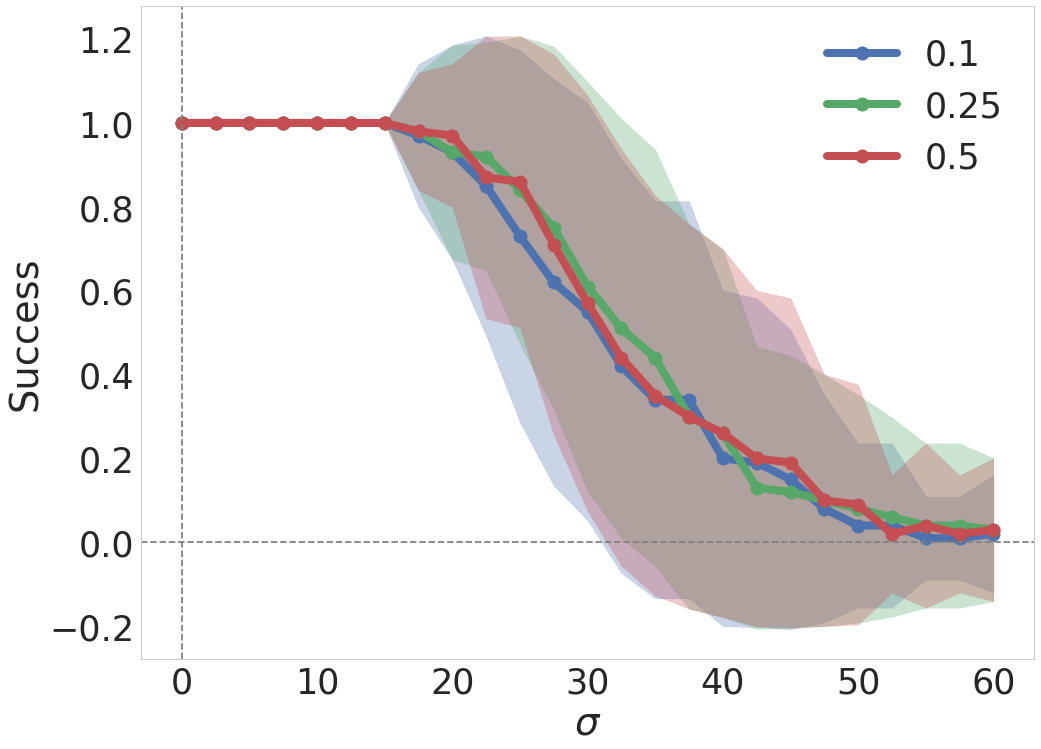

In [114]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
alpha = 0.3

for index, successes in enumerate(success_list):

    mean_success = np.mean(successes, axis=1)
    std = np.std(successes, axis=1)
   
    ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms, 
            label=str(T_persistence_list[index]))

    ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.legend();
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

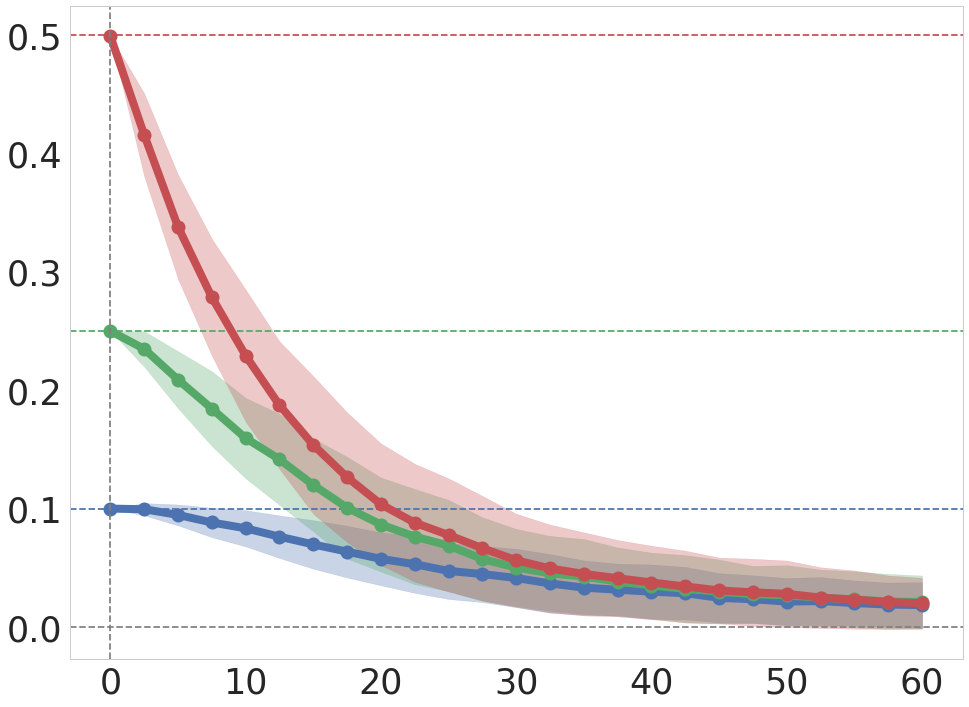

In [115]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, persistence_times in enumerate(persistent_time_list):
    persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

    pt_mean = np.mean(persistence_times, axis=(1, 2))
    pt_std = np.std(persistence_times, axis=(1, 2))
    ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
    ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                    color=current_palette[index], alpha=alpha)
    
    ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');